Библиометрический анализ журнала Feminist Economics


Цель проекта: провести библиометрический анализ международного научного журнала Feminist Economics с целью выявления основных тенденций развития научного направления Феминистская экономика (Экономика гендера). 


Описание данных: 
Спарсила с сайта редакции всю информацию о статьях и авторах. 
'Volume' Том (сквозная нумерация)
'Issue' Выпуск
'Issue_title' Название выпуска - есть в специальных выпусках
'Year' Год выпуска - с 1995 до 2022 
'Article_number' номер статьи - особенно важно, какая тема будет под номером один
'Title' - заглавие статьи - тоже полезно для определния тем
'Author1' -ФИО первого автора
'Author1_Info' - инфо о первом авторе. Из инфо можно извлечь страну, город, университет, факультет, номер ORCID  
'Author1_Contacts'- город и университет для авторов - так как для первых выпусков не было info
'Pages' номера страниц журнала - можно вычислить продолжительность статьи - но это будет не очень точно. Лучше количество знаков или слов. А на количество страниц могут влиять таблицы и рисунки и прочие приложения
'Date_published' дата онлайн публикации статьи
'DOI' номер DOI
'Abstract' - текст аннотации статьи 
'Highlights' -  основные тезисы статьи. Есть только в последней трети статей. Наверное легче удалить
'Keywords' - ключевые слова
'JEL codes' - посмотреть какие области экономических наук покрывает направление feminist economics 
'Views' - количество просмотров статьи на сайте - выделить самые популярные темы
'CrossRef'- количество ссылок на эту статью в научной литературе
'Almetric' -  колчисевто ссылок на эту статью в сми и соцсетях
'References' - список цитируемой литературы
'Citations' - список статей, процитировавших эту статью 
'WOS' - число цитат в базе данных Web of Science 
'Scopus' число цитат в Скопусе 
'Open_access' - 1 означает, что статья бесплатная, 0 - платная 
'lemmatized_text' - лемматизированный текст
'lemmatized_tokens лемматизированные токены 

Задачи и методы проекта: 


1. Выявить основные темы статей журнала на основе анализа аннотаций всех выпусков статьей (28 лет, 4 выпуска в год. После парсинга данных в табличке стало 925 строчек)
Методы: были испробованы методы кластеризации, LDA, но они не показали хороших и интерпретируемых результатов. Самой удачной вышла модель TF IDF 
TF-IDF (term frequency - inverse document frequency) — статистическая мера, используемая для оценки важности слова в контексте документа, являющегося частью коллекции документов или корпуса. Вес некоторого слова пропорционален частоте употребления этого слова в документе и обратно пропорционален частоте употребления слова во всех документах коллекции.

Мера TF-IDF часто используется в задачах анализа текстов и информационного поиска, например, как один из критериев релевантности документа поисковому запросу, при расчёте меры близости документов при кластеризации.

IDF не показала интересных результатов при использовании с одним словом. Поэтому попробовала посмотреть со словосочетаниями. 

Основные темы также можно посмотреть по ключевым словам и также посмотреть как они менялись по годам и сравнить с результатами анализа аннотаций 
Посмотреть темы по заглавиям статей 

2. Посмотреть, как менялись словосочетания по годам 
Сгруппировать таблицу по годам, объединить аннотации и посмотреть tf idf
Сделано 

3. Посмотреть контекст использования основных терминов, определяющих темы, таких как 
feminist / feminism, gender, 

Не сделано 

4. Посмотреть как связаны темы и авторы, особенно страны проживания и университеты, где работают авторы.  

5. Ключевые слова. Классифицировать ключевые слова и выделить оттуда названия стран, методы анализа и темы - сделано 

6. Посмотреть какие темы опубликуются в первой статье каждого выпуска журнала как самые главные с точки зрения редакции 

In [ ]:
7. Посмотреть какие темы (авторы, университеты) самые цитируемые в науке/ в сми

In [2]:
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
from tqdm import tqdm
import pandas as pd
import numpy as np
from collections import Counter
import seaborn as sns

pd.set_option('display.max_columns', None)
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sofiarebrey/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sofiarebrey/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sofiarebrey/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/sofiarebrey/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


True

In [4]:
df = pd.read_excel('tandfonline-02.xlsx')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer() 


In [5]:
df

,Volume,Issue,Issue_title,Year,Article_number,Title,Author1,Author1_Info,Author1_Contacts,Author2,Author2_Info,Author2_Contacts,Author3,Author3_Info,Author3_Contacts,Author4,Author4_Info,Author4_Contacts,Author5,Author5_Info,Author5_Contacts,Author6,Author6_Info,Author6_Contacts,Author7,Author7_Info,Author7_Contacts,Author8,Author8_Info,Author8_Contacts,Author9,Author9_Info,Author9_Contacts,Author10,Author10_Info,Author10_Contacts,Pages,Date_published,DOI,Abstract,Highlights,Keywords,JEL codes,Views,CrossRef,Almetric,References,Citations,WOS,Scopus,Open_access
0,1,1,NaN,1995,9689203,Creating a forum for feminist economic inquiry,Diana Strassmann,NaN,"Center for Cultural Studies, Rice University",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-5,18 Jun 2010,https://doi.org/10.1080/714042211,NaN,NaN,NaN,NaN,123.0,14,0,NaN,Sheba Tejani. (2019) What’s feminist about fem...,0.0,15.0,1
1,1,1,NaN,1995,9689204,Can feminist thought make economics more objec...,Sandra Harding,NaN,"Departments of Philosophy, University of Delaw...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7-32,18 Jun 2010,https://doi.org/10.1080/714042212,Feminist research is often perceived to be les...,NaN,"Feminism , method , objectivity , philosophy o...","Feminism , method , objectivity , philosophy o...",467.0,47,0,NaN,"Sarah Averi Albala, Frida Kasteng, Arne Hennin...",0.0,87.0,1
2,1,1,NaN,1995,9689205,Robinson Crusoe: The quintessential economic man?,Ulla Grapard,NaN,"Department of Economics, Colgate University, 1...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33-52,18 Jun 2010,https://doi.org/10.1080/714042213,The tale of Robinson Crusoe strikes a responsi...,NaN,"Robinson Crusoe , homo economics , self-suffi...","Robinson Crusoe , homo economics , self-suffi...",845.0,19,0,NaN,Nancy Folbre. (2020) Manifold exploitations: t...,0.0,58.0,1
3,1,1,NaN,1995,9689206,What difference does gender make? Rethinking p...,Carmen Diana Deere,NaN,"Department of Economics, University of Massach...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53-72,18 Jun 2010,https://doi.org/10.1080/714042214,This article argues that gender analysis has c...,NaN,"Peasants , gender , Latin American rural women...","Peasants , gender , Latin American rural women...",238.0,30,0,NaN,"Grettel Navas. (2022) ‘If there's no evidence,...",0.0,40.0,1
4,1,1,NaN,1995,9689207,"""Holding hands at midnight"": The paradox of ca...",Nancy Folbre,NaN,"Department of Economics, University of Massach...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73-92,18 Jun 2010,https://doi.org/10.1080/714042215,This paper puts recent feminist theorizing abo...,NaN,"Caring , labor , family , policy , altruism , ...","Caring , labor , family , policy , altruism , ...",842.0,145,25,NaN,"Özlem Onaran, Cem Oyvat, Eurydice Fotopoulou. ...",0.0,189.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,28,1,NaN,2022,1976808,Seasonal Migration and Feminization of Farm Ma...,S. Chandrasekhar,S. Chandrasekhar is Professor at Indira Gandhi...,a Indira Gandhi Institute of Development Resea...,Soham Sahoo,Soham Sahoo is Assistant Professor at the Cent...,b Indian Institute of Management Bangalore – C...,Hema Swaminathan,Hema Swaminathan is Associate Professor at the...,c Indian Institute of Management Bangalore – C...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86-113,07 Nov 2021,https://doi.org/10.1080/13545701.2021.1976808,NaN,the importance of unpacking the feminization ...,"Feminization of agriculture, women farm manage..."

In [6]:
# С помощью регулярных выражений оставляем только слова и слова, написанные через дефис и 
# и делаем нижний регистр, а также проводим лемматизацию и очищаем от стоп-слов 

def clean(text):
    tokens = re.findall('\w+-?\w*', text.lower())
    tokens = [lemmatizer.lemmatize(tok) for tok in tokens if tok not in stop_words]
    return ' '.join(tokens)


In [41]:
#Оставляем только непустые значения аннотаций, чистим и токенизируем аннотации
df = df[~df.Abstract.isna()]
df['lemmatized_text'] = df['Abstract'].apply(clean)

In [45]:

def get_idf_tokens(texts, max_df, min_df=4):
    total = len(texts)
    max_df = int(total * max_df)
    doc_freq = dict()
    
    for text in texts:
        tokens = text.split(' ')
        for token in set(tokens):
            if token not in doc_freq:
                doc_freq[token] = 1
            else:
                doc_freq[token] += 1
    
    idf_dict = {token: np.log(total/doc_freq[token]) 
                for token in doc_freq 
                if doc_freq[token] > min_df and doc_freq[token] <= max_df}
    return idf_dict, idf_dict

def get_idf_ngrams(texts, max_df, min_df=4, ngram_range=2):
    total = len(texts)
    max_df = int(total * max_df)
    doc_freq = dict()
    
    for text in texts:
        tokens = text.split(' ')
        tokens = nltk.ngrams(tokens, ngram_range)
        for token in set(tokens):
            if token not in doc_freq:
                doc_freq[token] = 1
            else:
                doc_freq[token] += 1
    
    idf_dict = {token: np.log(total/doc_freq[token]) 
                for token in doc_freq 
                if doc_freq[token] > min_df and doc_freq[token] <= max_df}
    return idf_dict, doc_freq

def get_tf_dict(texts, ngram_range=2):
    tf_dict = dict()
    
    for text in texts:
        tokens = text.split(' ')
        if ngram_range >= 2:
            tokens = nltk.ngrams(tokens, ngram_range)
        for token in set(tokens):
            if token not in tf_dict:
                tf_dict[token] = 1
            else:
                tf_dict[token] += 1
    return tf_dict
            
        

In [46]:
tf_dict = get_tf_dict(df['lemmatized_text'], 2)
sorted_tokens = sorted(tf_dict.items(), key=lambda x: x[1], reverse=True)

In [47]:
#Наиболее важные словосочетания для аннотаций
sorted_tokens

[(('labor', 'market'), 95),
 (('labor', 'force'), 60),
 (('men', 'woman'), 59),
 (('study', 'find'), 58),
 (('woman', 'men'), 50),
 (('united', 'state'), 49),
 (('woman', 'labor'), 47),
 (('feminist', 'economics'), 46),
 (('force', 'participation'), 41),
 (('gender', 'gap'), 40),
 (('gender', 'inequality'), 40),
 (('using', 'data'), 39),
 (('study', 'examines'), 39),
 (('gender', 'difference'), 35),
 (('paid', 'work'), 34),
 (('woman', 'employment'), 32),
 (('paper', 'examines'), 30),
 (('feminist', 'economist'), 30),
 (('result', 'show'), 29),
 (('developing', 'country'), 28),
 (('unpaid', 'work'), 27),
 (('study', 'us'), 27),
 (('gender', 'equality'), 27),
 (('result', 'suggest'), 24),
 (('paper', 'argues'), 23),
 (('married', 'woman'), 23),
 (('time', 'use'), 22),
 (('woman', 'worker'), 22),
 (('paper', 'explores'), 22),
 (('bargaining', 'power'), 21),
 (('economic', 'growth'), 21),
 (('paid', 'unpaid'), 21),
 (('survey', 'data'), 20),
 (('among', 'woman'), 20),
 (('study', 'analyze

In [83]:
data = pd.DataFrame(sorted_tokens,columns=['collocations','freq'])

In [84]:
data.collocations

0                (labor, market)
1                 (labor, force)
2                   (men, woman)
3                  (study, find)
4                   (woman, men)
                  ...           
42271          (penalty, larger)
42272      (social, interaction)
42273    (occupation, requiring)
42274        (requiring, social)
42275       (larger, occupation)
Name: collocations, Length: 42276, dtype: object

In [85]:
data.to_excel('collocations.xlsx')

In [32]:
df['lemmatized_tokens'] = df['lemmatized_text'].apply(lambda x: x.split())
grouped_per_year = df.groupby('Year')['lemmatized_tokens'].sum().reset_index()
year_count = df.groupby('Year')['Abstract'].count().reset_index()

grouped_per_year['freq'] = grouped_per_year['lemmatized_tokens'].apply(Counter)
grouped_per_year['total_abs'] = year_count['Abstract']

year_count = dict(zip(year_count['Year'], year_count['Abstract']))

In [34]:
year_count

{1995: 32,
 1996: 24,
 1997: 24,
 1998: 27,
 1999: 29,
 2000: 21,
 2001: 17,
 2002: 22,
 2003: 22,
 2004: 21,
 2005: 21,
 2006: 19,
 2007: 24,
 2008: 25,
 2009: 24,
 2010: 23,
 2011: 25,
 2012: 29,
 2013: 31,
 2014: 35,
 2015: 30,
 2016: 32,
 2017: 32,
 2018: 33,
 2019: 34,
 2020: 31,
 2021: 41,
 2022: 3}

In [14]:
grouped_per_year

,Year,lemmatized_tokens,freq,total_abs
0,1995,"[feminist, research, often, perceived, le, obj...","{'feminist': 23, 'research': 12, 'often': 3, '...",32
1,1996,"[neoclassical, theory, posit, undifferentiated...","{'neoclassical': 3, 'theory': 6, 'posit': 2, '...",24
2,1997,"[highlighting, problem, posed, unitary, concep...","{'highlighting': 1, 'problem': 1, 'posed': 1, ...",24
3,1998,"[social, security, reform, high, agenda, many,...","{'social': 8, 'security': 4, 'reform': 2, 'hig...",27
4,1999,"[economic, reform, program, implemented, centr...","{'economic': 24, 'reform': 1, 'program': 3, 'i...",29
5,2000,"[swedish, welfare, state, usually, considered,...","{'swedish': 2, 'welfare': 8, 'state': 11, 'usu...",21
6,2001,"[conventional, method, analysis, poverty, assu...","{'conventional': 1, 'method': 2, 'analysis': 5...",17
7,2002,"[policy, maker, increasingly, rely, theory, so...","{'policy': 17, 'maker': 2, 'increasingly': 1, ...",22
8,2003,"[article, outline, pilot, program, undertaken,...","{'article': 4, 'outline': 2, 'pilot': 2, 'prog...",22
9,2004,"[paper, challenge, idea, social, clause, enfor...","{'paper': 15, 'challenge': 1, 'idea': 2, 'soci...",21


In [27]:
grouped_per_year.freq[0]

Counter({'feminist': 23,
         'research': 12,
         'often': 3,
         'perceived': 1,
         'le': 4,
         'objective': 1,
         'conventional': 7,
         'ground': 2,
         'latter': 2,
         'value-neutral': 2,
         'former': 1,
         'essay': 6,
         'show': 2,
         'major': 2,
         'problem': 4,
         'familiar': 2,
         'standard': 5,
         'maximizing': 2,
         'objectivity': 6,
         'permit': 1,
         'conclusion': 6,
         'weak': 2,
         'resource': 1,
         'detecting': 1,
         'widespread': 1,
         'cultural': 3,
         'assumption': 8,
         'value': 7,
         'interest': 5,
         'androcentric': 4,
         'one': 4,
         'work': 39,
         'draw': 1,
         'attention': 5,
         'good': 5,
         'method': 3,
         'identifying': 2,
         'differ': 1,
         'researcher': 3,
         'community': 1,
         'however': 5,
         'since': 3,
         'cultu

In [29]:
sorted_tokens1 = sorted(grouped_per_year.freq[0].items(), key=lambda x: x[1], reverse=True)

In [30]:
sorted_tokens1

[('woman', 52),
 ('work', 39),
 ('family', 30),
 ('feminist', 23),
 ('paper', 23),
 ('gender', 21),
 ('policy', 21),
 ('child', 19),
 ('economic', 18),
 ('labor', 17),
 ('economist', 16),
 ('parent', 14),
 ('would', 14),
 ('economics', 13),
 ('also', 13),
 ('market', 13),
 ('care', 13),
 ('model', 13),
 ('research', 12),
 ('working', 12),
 ('welfare', 12),
 ('increase', 11),
 ('argues', 11),
 ('theory', 11),
 ('household', 10),
 ('social', 10),
 ('education', 10),
 ('life', 10),
 ('earnings', 10),
 ('analysis', 9),
 ('study', 9),
 ('wage', 9),
 ('assumption', 8),
 ('many', 8),
 ('issue', 8),
 ('power', 8),
 ('within', 8),
 ('use', 8),
 ('examines', 8),
 ('benefit', 8),
 ('development', 8),
 ('worker', 8),
 ('difference', 8),
 ('marriage', 8),
 ('gap', 8),
 ('service', 8),
 ('conventional', 7),
 ('value', 7),
 ('support', 7),
 ('concept', 7),
 ('public', 7),
 ('based', 7),
 ('effect', 7),
 ('bargaining', 7),
 ('poor', 7),
 ('hwp', 7),
 ('poverty', 7),
 ('plan', 7),
 ('essay', 6),
 ('obj

In [21]:
def get_token_freq_data(token, grouped_df, year_count):
    result = []
    for i, row in grouped_df.iterrows():
        if token in row.freq:
            result.append((row.Year, token, row.freq[token] / year_count[row.Year]))
        else: 
            result.append((row.Year, token, 0))
    result = pd.DataFrame(result, columns=['Year', 'token', 'freq'])
    sns.barplot(x="Year", y="freq", data=result).set_title(f'Частота {token}')
    return result
    

,Year,token,freq
0,1995,gender,0.656250
1,1996,gender,0.875000
2,1997,gender,0.458333
3,1998,gender,1.074074
4,1999,gender,0.275862
5,2000,gender,1.142857
6,2001,gender,0.705882
7,2002,gender,1.681818
8,2003,gender,0.727273
9,2004,gender,0.238095


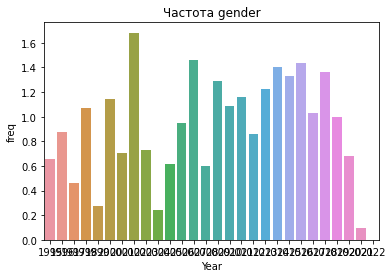

In [22]:
get_token_freq_data('gender', grouped_per_year, year_count)

In [86]:
df.Keywords

1      Feminism , method , objectivity , philosophy o...
2      Robinson Crusoe ,  homo economics , self-suffi...
3      Peasants , gender , Latin American rural women...
4      Caring , labor , family , policy , altruism , ...
5      Child care , quantitative economics research ,...
                             ...                        
914    Bargaining power, empowerment, entrepreneurshi...
915                                                  NaN
916    Degrowth, care work, commons, decolonial femin...
917    Self-help group, domestic violence, dowry, Ind...
918    Asset, poverty, wealth, Ecuador, feminization ...
Name: Keywords, Length: 731, dtype: object

In [87]:
df.Keywords.isna().sum()

58

In [94]:
key = df[~df.Keywords.isna()]

In [95]:
key.Keywords=key.Keywords.apply(lambda x:x.lower())

In [101]:
key['keywords_tokens'] = df['Keywords'].apply(lambda x: x.split())
key['freq']=key['keywords_tokens'].apply(Counter)

In [102]:
key.freq

1      {'feminism': 1, ',': 7, 'method': 1, 'objectiv...
2      {'robinson': 1, 'crusoe': 1, ',': 6, 'homo': 1...
3      {'peasants': 1, ',': 4, 'gender': 1, 'latin': ...
4      {'caring': 1, ',': 5, 'labor': 1, 'family': 1,...
5      {'child': 3, 'care': 3, ',': 5, 'quantitative'...
                             ...                        
913    {'gender': 1, 'wealth': 1, 'gap,': 1, 'inequal...
914    {'bargaining': 1, 'power,': 1, 'empowerment,':...
916    {'degrowth,': 1, 'care': 1, 'work,': 1, 'commo...
917    {'self-help': 1, 'group,': 1, 'domestic': 1, '...
918    {'asset,': 1, 'poverty,': 2, 'wealth,': 1, 'ec...
Name: freq, Length: 673, dtype: object

In [ ]:
grouped_per_year['freq'] = grouped_per_year['lemmatized_tokens'].apply(Counter)